$$\text{SimRank}$$

$$ \text{SimRank(кто похож) - Similarity index/rank} \\
\text{Ищем матрицу S для всех пар узлов} \\
\text{Узлы графа a и b похожи, если значение S побольше} $$

$$\text{SimRank демонстрирует транзитивность в том смысле, что если узел a похож на узел b, а узел b похож на узел d,} \\ 
\text{то узел a должен быть похож на узел d в некоторой степени, как следует из рекурсивной формулы.}$$


$$ 
s(a, b) = 
\begin{cases}
    1, \ \text{если a = b} \\
    0, \ I(a) = \varnothing \ \text{или} \ I(b) = \varnothing \ \text{(если вершины изолированы)} \\
    \frac{C}{|I(a)||I(b)|} \sum_{i = 1}^{|I(a)|}\sum_{j = 1}^{|I(b)|} s(I_i(a), I_j(b)), \ где \ C \in [0; 1], \ \text{иначе}
\end{cases} \\
$$

$$
I(a) - \text{количество тех, кто ссылается на a (множество соседей a)}\\
I(b) - \text{количество тех, кто ссылается на b (множество соседей b)}\\
\sum - \ \text{сумма похожести соседей} \\
$$

$$
\text{P.S. Если s(a, b) = 0} \Rightarrow \text{узел с кем-то дружит, а с ним никто (граф направленный)} \\
\text{Параметр C лежит внутри [0; 1] и регулируется в зависимости от того, насколько жестко хотим кого-то изолировать} \\
\text {(как быстро сходство уменьшается с расстоянием между узлами в терминах путей)} \\
\text{Если C = 0} \Rightarrow \text{каждый уникален} \\
\text{Если C = 1} \Rightarrow \text{схожи(одинаковы) все, у кого есть хоть один общий соседи (позволяет идентифицировать тех, кто изолирован)} \\
$$

<!-- $$\Longleftrightarrow$$ -->
$$ \Updownarrow$$

$$ 
\text{Матричная форма} \\  
S = c \cdot \^A^{T} S \^A - c \cdot diag(\^A^{T} S \^A) + I \\
\^A - \text{матрица связности, нормированная по столбцам} \\ 
% \Downarrow \\
% S_0 = I \\
% S_{k+1} = c \cdot \^A^{T} S_k \^A - c \cdot diag(\^A^{T} S_k \^A) + I \\
$$

$$
\text{Итерационный процесс} \\
S_0 = I \\
S_{k+1} = c \cdot \^A^{T} S_k \^A - c \cdot diag(\^A^{T} S_k \^A) + I \\
$$

# Библиотеки

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Функция SimRank

In [60]:
def SimRank(G, C, max_iter=100):
    """
    Compute SimRank similarity measure for graph G.
    :param G: NetworkX graph
    :param C: Coefficient
    :param max_iter: Maximum number of iterations
    :return: Matrix of similarity values
    """
    nodes = list(G.nodes)
    n = len(nodes)
    adj = nx.adjacency_matrix(G).toarray()  # матрица смежности
    adj_normed = adj / np.maximum(np.array([1]), adj.sum(axis=0))   # матрица смежности, нормированная по столбцам
    
    sim = np.eye(n)
    for it in range(max_iter):
        prev_sim = sim.copy()
        matmul = adj_normed.T @ prev_sim @ adj_normed
        sim = C * (matmul - np.diag(matmul.diagonal())) + np.eye(n)
        if np.linalg.norm(sim - prev_sim) < 10e-7:
            print(f'Количество итераций = {it + 1}')
            break
    return sim

# Ориентированный граф

In [61]:
def PaintGraph(G, S):
    """
    Convert marix to dictionary for painting graph with similarity values
    :param G: NetworkX graph
    :param S: Matrix of similarity values
    """
    nodes = list(G.nodes)
    similarity = {(nodes[i], nodes[j]): S[i, j] for i in range(len(nodes)) for j in range(len(nodes))}
    # print(similarity)
    pos = nx.circular_layout(G)
    options = {
        'node_color': G.nodes,      # цвет узла
        'node_size': 600,           # размер узла
        'width': 1,                 # ширина линии ребер
        'edge_color':'gray',        # цвет ребра
        'font_color':'black',       # цвет шрифта
    }
    nx.draw(G, pos=pos, with_labels = True, **options)

    # Рисуем метки ребер
    edge_labels = {(u, v): f"{similarity.get((u, v)):.2f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

    plt.title('╰( ͡° ͜ʖ ͡° )──☆*˚ Визуализация графа с SimRank ✧˚')  
    plt.show()

Узлы:
 ['skyblue', 'bisque', 'pink', 'paleturquoise', 'palegreen', 'orange', 'hotpink', 'mediumseagreen']
Количество итераций = 23


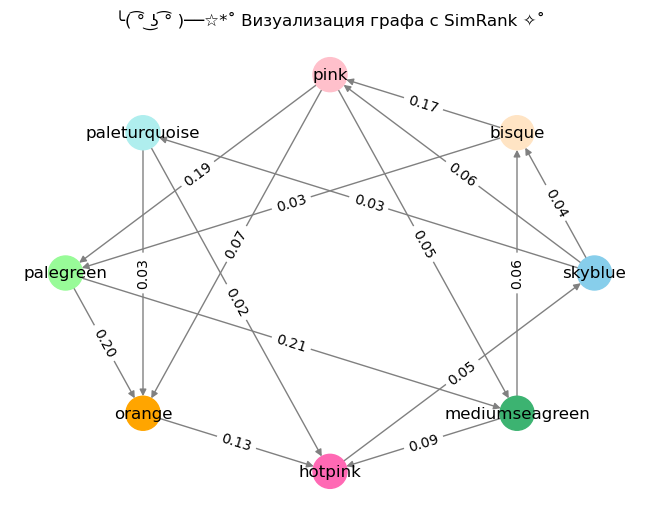

In [62]:
G = nx.DiGraph(directed=True)
G.add_edges_from(
    [
        ('skyblue', 'bisque'), 
        ('skyblue', 'pink'), 
        ('skyblue', 'paleturquoise'), 
        ('bisque', 'pink'), 
        ('bisque', 'palegreen'), 
        ('pink', 'palegreen'), 
        ('pink', 'orange'), 
        ('palegreen', 'orange'),
        ('paleturquoise', 'orange'),
        ('paleturquoise', 'hotpink'),
        ('palegreen', 'mediumseagreen'),
        ('mediumseagreen', 'hotpink'),
        ('orange', 'hotpink'),
        ('hotpink', 'skyblue'),
        ('mediumseagreen', 'bisque'),
        ('pink', 'mediumseagreen'), 
    ]
)
nodes = list(G.nodes)
print(f"Узлы:\n {nodes}")

# SimRank
sim_matrix = SimRank(G, C=0.6)

# Рисуем граф
PaintGraph(G, sim_matrix)

### Матрица связности заданного графа

In [63]:
adj = nx.adjacency_matrix(G).toarray()  # матрица смежности
adj_normed = adj / np.maximum(np.array([1]), adj.sum(axis=0))   # матрица смежности, нормированная по столбцам
df = pd.DataFrame(adj, columns=nodes, index=nodes)
print("Матрица связности:")
df

Матрица связности:


,skyblue,bisque,pink,paleturquoise,palegreen,orange,hotpink,mediumseagreen
skyblue,0,1,1,1,0,0,0,0
bisque,0,0,1,0,1,0,0,0
pink,0,0,0,0,1,1,0,1
paleturquoise,0,0,0,0,0,1,1,0
palegreen,0,0,0,0,0,1,0,1
orange,0,0,0,0,0,0,1,0
hotpink,1,0,0,0,0,0,0,0
mediumseagreen,0,1,0,0,0,0,1,0


### Матрица сходства SimRank заданного графа

In [64]:
df = pd.DataFrame(sim_matrix, columns=nodes, index=nodes)
print("Матрица сходства SimRank:")
df

Матрица сходства SimRank:


,skyblue,bisque,pink,paleturquoise,palegreen,orange,hotpink,mediumseagreen
skyblue,1.000000,0.039974,0.056243,0.028151,0.057469,0.030879,0.046918,0.040356
bisque,0.039974,1.000000,0.170359,0.312107,0.029804,0.043158,0.140558,0.055397
pink,0.056243,0.170359,1.000000,0.311992,0.189986,0.065413,0.051005,0.047081
paleturquoise,0.028151,0.312107,0.311992,1.000000,0.028865,0.028372,0.019877,0.034113
palegreen,0.057469,0.029804,0.189986,0.028865,1.000000,0.201425,0.083515,0.208522
orange,0.030879,0.043158,0.065413,0.028372,0.201425,1.000000,0.128386,0.272083
hotpink,0.046918,0.140558,0.051005,0.019877,0.083515,0.128386,1.000000,0.086330
mediumseagreen,0.040356,0.055397,0.047081,0.034113,0.208522,0.272083,0.086330,1.000000


# Циклический граф

In [53]:
def Create_directed_cycle_graph(node_names):
    """
    Создает направленный циклический граф с именованными узлами
    :param node_names: names of nodes
    """
    num_nodes = len(node_names)
    edges = [(node_names[i], node_names[(i + 1) % num_nodes]) for i in range(num_nodes)]
    G = nx.DiGraph() # направленный граф
    G.add_edges_from(edges)
    return G

In [54]:
def PaintCycle(G, S):
    """
    Convert marix to dictionary for painting graph with similarity values
    :param G: NetworkX graph
    :param S: Matrix of similarity values
    """
    nodes = list(G.nodes)
    similarity = {(nodes[i], nodes[j]): S[i, j] for i in range(len(nodes)) for j in range(len(nodes))}

    #Рисуем граф
    options = {
            'node_color': ['pink', 'orange', 'skyblue', 'violet', 'palegreen'],       # цвет узла
            'node_size': 1000,          # размер узла
            'width': 1,                 # ширина линии ребер
            'edge_color':'gray',        # цвет ребра
            'font_color':'black',       # цвет шрифта
            'arrowsize' : 20, 
            'arrowstyle' : '-|>', 
    }
    pos = nx.circular_layout(G)
    nx.draw(G, pos=pos, with_labels = True, **options)

    # Рисуем метки ребер
    edge_labels = {(u, v): f"{similarity.get((u, v)):.2f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

    plt.title('╰( ͡° ͜ʖ ͡° )──☆*˚ Визуализация циклического графа с SimRank ✧˚')  
    plt.show() 

Узлы:
 ['A', 'B', 'C', 'D', 'E']
Количество итераций = 44


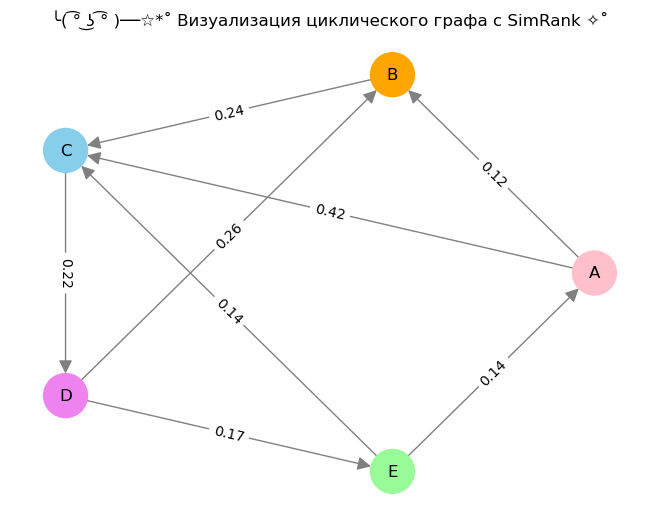

In [56]:
# Задаём направленный циклический граф
nodes_cycle= ['A', 'B', 'C', 'D', 'E']
cycle_graph = Create_directed_cycle_graph(nodes_cycle)
cycle_graph.add_edges_from(
    [
        ("A","C"),
        ("E","C"),
        ("D","B"),
    ]
)
print(f"Узлы:\n {nodes_cycle}")

# SimRank
sim_cycle = SimRank(cycle_graph, C=0.8)

#Рисуем граф
PaintCycle(cycle_graph, sim_cycle)

In [57]:
# Матрица связности
adj_cycle = nx.adjacency_matrix(cycle_graph).toarray()  
adj_cycle_normed = adj_cycle / np.maximum(np.array([1]), adj_cycle.sum(axis=0))   # матрица связности, нормированная по столбцам
df_cycle = pd.DataFrame(adj_cycle, columns=nodes_cycle, index=nodes_cycle)
print("Матрица связности:")
df_cycle

Матрица связности:


,A,B,C,D,E
A,0,1,1,0,0
B,0,0,1,0,0
C,0,0,0,1,0
D,0,1,0,0,1
E,1,0,1,0,0


In [58]:
# Матрица сходства SimRank
df_cycle = pd.DataFrame(sim_cycle, columns=nodes_cycle, index=nodes_cycle)
print("Матрица сходства SimRank:")
df_cycle

Матрица сходства SimRank:


,A,B,C,D,E
A,1.000000,0.124138,0.422484,0.115963,0.137931
B,0.124138,1.000000,0.240753,0.255200,0.446385
C,0.422484,0.240753,1.000000,0.215517,0.144954
D,0.115963,0.255200,0.215517,1.000000,0.172414
E,0.137931,0.446385,0.144954,0.172414,1.000000


# Звездчатый граф

In [90]:
def Create_directed_star_graph(node_names, center_node):
    """
    Создает направленный звездчатый граф
    :param node_names: names of nodes
    :center_node: center node
    """
    G = nx.DiGraph()
    G.add_nodes_from(node_names)
    for node in node_names:
        if node != center_node:
            G.add_edge(center_node, node) #Ребро от центра к другим узлам
    return G

In [112]:
def PaintStar(G, S):
    """
    Convert marix to dictionary for painting graph with similarity values
    :param G: NetworkX graph
    :param S: Matrix of similarity values
    """
    nodes = list(G.nodes)
    similarity = {(nodes[i], nodes[j]): S[i, j] for i in range(len(nodes)) for j in range(len(nodes))}

    #Рисуем граф
    options = {
            'node_color': 'pink',       # цвет узла 
            'node_size': 1000,          # размер узла
            'width': 1,                 # ширина линии ребер
            'edge_color':'gray',        # цвет ребра
            'font_color':'black',       # цвет шрифта
            'arrowsize' : 20, 
            'arrowstyle' : '-|>', 
    }
    pos = nx.spectral_layout(G)
    nx.draw(G, pos=pos, with_labels = True, **options)

    # Рисуем метки ребер
    edge_labels = {(u, v): f"{similarity.get((u, v)):.2f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

    plt.title('╰( ͡° ͜ʖ ͡° )──☆*˚ Визуализация звёздчатого графа с SimRank ✧˚')  
    plt.show() 

Узлы:
 ['A', 'B', 'C', 'D', 'E']
Количество итераций = 3


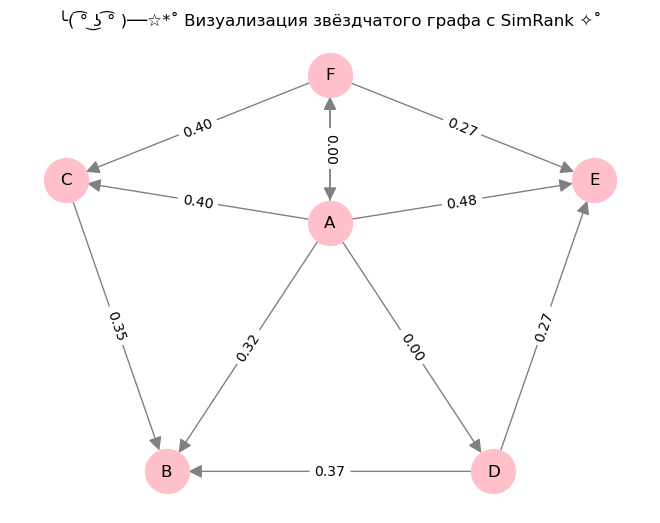

In [113]:
# Задаём направленный звездчатый граф
nodes_star = ['A', 'B', 'C', 'D', 'E', 'F']
center_node = 'A'  # Центральный узел
star_graph = Create_directed_star_graph(nodes_star, center_node)
star_graph.add_edges_from(
    [
        ("F","C"),
        ("F","E"),
        ("D","E"),
        ("D","B"),
        ("C","B"),
        ("F","A"),
    ]
)
print(f"Узлы:\n {nodes_cycle}")

# SimRank
sim_star = SimRank(star_graph, C=0.8)

#Рисуем граф
PaintStar(star_graph, sim_star)

In [114]:
# Матрица связности
adj_star = nx.adjacency_matrix(star_graph).toarray()  
adj_star_normed = adj_star / np.maximum(np.array([1]), adj_star.sum(axis=0))   # матрица связности, нормированная по столбцам
df_star = pd.DataFrame(adj_star, columns=nodes_star, index=nodes_star)
print("Матрица связности:")
df_star

Матрица связности:


,A,B,C,D,E,F
A,0,1,1,1,1,1
B,0,0,0,0,0,0
C,0,1,0,0,0,0
D,0,1,0,0,1,0
E,0,0,0,0,0,0
F,1,0,1,0,1,0


In [115]:
# Матрица сходства SimRank
df_star = pd.DataFrame(sim_star, columns=nodes_star, index=nodes_star)
print("Матрица сходства SimRank:")
df_star

Матрица сходства SimRank:


,A,B,C,D,E,F
A,1.00,0.320000,0.400000,0.000000,0.480000,0.000000
B,0.32,1.000000,0.346667,0.373333,0.355556,0.373333
C,0.40,0.346667,1.000000,0.400000,0.373333,0.400000
D,0.00,0.373333,0.400000,1.000000,0.266667,0.800000
E,0.48,0.355556,0.373333,0.266667,1.000000,0.266667
F,0.00,0.373333,0.400000,0.800000,0.266667,1.000000


# Данные из статьи

Количество итераций = 25


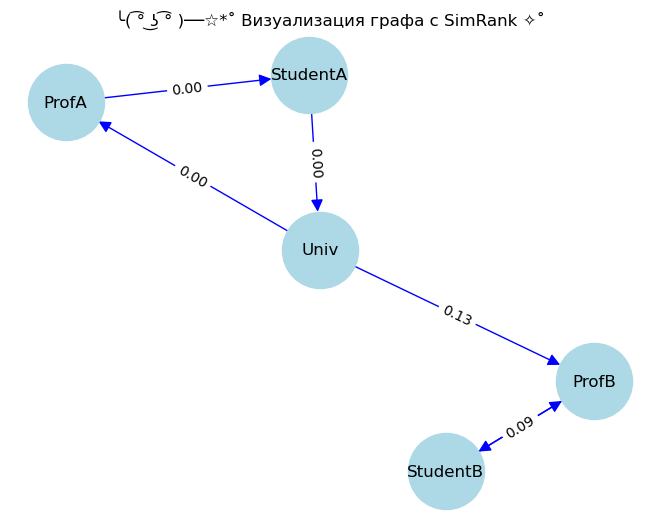

In [165]:
# граф G
G = nx.DiGraph(directed=True)  # ориентированный граф
G.add_edges_from(
    [
        ("Univ","ProfA"),
        ("ProfA","StudentA"),
        ("StudentA","Univ"),
        ("Univ","ProfB"),
        ("ProfB","StudentB"),
        ("StudentB","ProfB"),
    ]
)

options = {
    'node_color': 'lightblue',  # color of node
    'node_size': 3000,          # size of node
    'width': 1,                 # line width of edges
    'arrowstyle': '-|>',        # array style for directed graph
    'arrowsize': 18,            # size of arrow
    'edge_color':'blue',        # edge color
}

sim = SimRank(G, C=0.8)
nodes = list(G.nodes)
similarity = {(nodes[i], nodes[j]): sim[i, j] for i in range(len(nodes)) for j in range(len(nodes))}

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels = True, **options)

# Рисуем метки ребер
edge_labels = {(u, v): f"{similarity.get((u, v)):.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

plt.title('╰( ͡° ͜ʖ ͡° )──☆*˚ Визуализация графа с SimRank ✧˚')  
plt.show() 

In [161]:
adj = nx.adjacency_matrix(G).toarray()  # матрица смежности
adj_normed = adj / np.maximum(np.array([1]), adj.sum(axis=0))   # матрица смежности, нормированная по столбцам
df = pd.DataFrame(adj, columns=nodes, index=nodes)
print("Матрица связности:")
df

Матрица связности:


,Univ,ProfA,StudentA,ProfB,StudentB
Univ,0,1,0,1,0
ProfA,0,0,1,0,0
StudentA,1,0,0,0,0
ProfB,0,0,0,0,1
StudentB,0,0,0,1,0


In [158]:
# Матрица сходства SimRank
df = pd.DataFrame(sim, columns=nodes, index=nodes)
print("Матрица сходства SimRank:")
df

Матрица сходства SimRank:


,Univ,ProfA,StudentA,ProfB,StudentB
Univ,1.000000,0.000000,0.000000,0.132336,0.033878
ProfA,0.000000,1.000000,0.000000,0.413551,0.105869
StudentA,0.000000,0.000000,1.000000,0.042348,0.330841
ProfB,0.132336,0.413551,0.042348,1.000000,0.088224
StudentB,0.033878,0.105869,0.330841,0.088224,1.000000
